## Vanishing Gradient

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf
import keras
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from keras.layers import Dense
from keras.models import Sequential

In [2]:
X,y=make_moons(n_samples=300, noise=0.05, random_state=42)

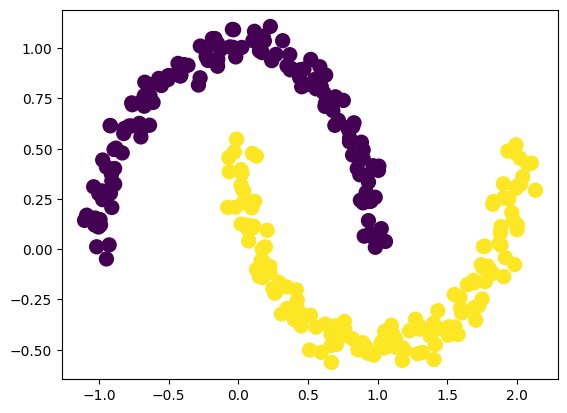

In [3]:
plt.scatter(X[:,0,],X[:,1],c=y,s=100)
plt.show()

In [18]:
model = Sequential()
model.add(Dense(10,activation='sigmoid',input_dim=2))
model.add(Dense(10,activation='sigmoid'))
model.add(Dense(10,activation='sigmoid'))
model.add(Dense(10,activation='sigmoid'))
model.add(Dense(10,activation='sigmoid'))
model.add(Dense(10,activation='sigmoid'))
model.add(Dense(10,activation='sigmoid'))
model.add(Dense(10,activation='sigmoid'))
model.add(Dense(10,activation='sigmoid'))
model.add(Dense(10,activation='sigmoid'))
model.add(Dense(10,activation='sigmoid'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
print(model.summary())
old_weights = model.get_weights()[0]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
print(model.fit(X_train, y_train, epochs = 100))
new_weights = model.get_weights()[0]
lr=model.optimizer.get_config()["learning_rate"]
gradient = (old_weights - new_weights)/ lr
percent_change = abs(100*(old_weights - new_weights)/ old_weights)
print(gradient,'\n--------------------------------------------------------------------------\n',
percent_change,'\n--------------------------------------------------------------------------\n',
old_weights,'\n--------------------------------------------------------------------------\n',
new_weights)

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_28 (Dense)            (None, 10)                30        
                                                                 
 dense_29 (Dense)            (None, 10)                110       
                                                                 
 dense_30 (Dense)            (None, 10)                110       
                                                                 
 dense_31 (Dense)            (None, 10)                110       
                                                                 
 dense_32 (Dense)            (None, 10)                110       
                                                                 
 dense_33 (Dense)            (None, 10)                110       
                                                                 
 dense_34 (Dense)            (None, 10)               

Here we can observe the vanishing GD since the loss is not changing at all

1) We can solve this problem at initial level by Reducing the Hidden layers 

In [19]:
model = Sequential()

model.add(Dense(10,activation='sigmoid',input_dim=2))
model.add(Dense(10,activation='sigmoid'))
model.add(Dense(10,activation='sigmoid'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
print(model.summary())
old_weights = model.get_weights()[0]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
print(model.fit(X_train, y_train, epochs = 100))
new_weights = model.get_weights()[0]
lr=model.optimizer.get_config()["learning_rate"]
gradient = (old_weights - new_weights)/ lr
percent_change = abs(100*(old_weights - new_weights)/ old_weights)
print(gradient,'\n--------------------------------------------------------------------------\n',
percent_change,'\n--------------------------------------------------------------------------\n',
old_weights,'\n--------------------------------------------------------------------------\n',
new_weights)

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_40 (Dense)            (None, 10)                30        
                                                                 
 dense_41 (Dense)            (None, 10)                110       
                                                                 
 dense_42 (Dense)            (None, 10)                110       
                                                                 
 dense_43 (Dense)            (None, 1)                 11        
                                                                 
Total params: 261
Trainable params: 261
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/100
8/8 [==============================] - 1s 5ms/step - loss: 0.6924 - accuracy: 0.5167
Epoch 2/100
8/8 [==============================] - 0s 7ms/step - loss: 0.6919 - accura

Here we can observe loss changed from 0.69 to 0.35 which is good.

2) We can change the activation function to ReLU to overcome Vanishing GD.

In [17]:
model = Sequential()
model.add(Dense(10,activation='relu',input_dim=2))
model.add(Dense(10,activation='relu'))
model.add(Dense(10,activation='relu'))
model.add(Dense(10,activation='relu'))
model.add(Dense(10,activation='relu'))
model.add(Dense(10,activation='relu'))
model.add(Dense(10,activation='relu'))
model.add(Dense(10,activation='relu'))
model.add(Dense(10,activation='relu'))
model.add(Dense(10,activation='relu'))
model.add(Dense(10,activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
print(model.summary())
old_weights = model.get_weights()[0]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
print(model.fit(X_train, y_train, epochs = 100))
new_weights = model.get_weights()[0]
lr=model.optimizer.get_config()["learning_rate"]
gradient = (old_weights - new_weights)/ lr
percent_change = abs(100*(old_weights - new_weights)/ old_weights)
print(gradient,'\n--------------------------------------------------------------------------\n',
percent_change,'\n--------------------------------------------------------------------------\n',
old_weights,'\n--------------------------------------------------------------------------\n',
new_weights)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_16 (Dense)            (None, 10)                30        
                                                                 
 dense_17 (Dense)            (None, 10)                110       
                                                                 
 dense_18 (Dense)            (None, 10)                110       
                                                                 
 dense_19 (Dense)            (None, 10)                110       
                                                                 
 dense_20 (Dense)            (None, 10)                110       
                                                                 
 dense_21 (Dense)            (None, 10)                110       
                                                                 
 dense_22 (Dense)            (None, 10)               

Here, ReLU's resulted loss changed from 0.69 to 3.9788e-04 leading to accuracy 1.